### Assignment:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.feature_selection import RFECV

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_house = pd.read_csv('train.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_house.shape

(1460, 81)

In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
missing_data = round(100 * df_house.isnull().sum()/ len(df_house) , 2)
missing_data.sort_values(inplace=True, ascending=False)
missing_data[(missing_data <100) & (missing_data >0)]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [7]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    df_house[i].fillna("none", inplace=True)

In [8]:
df_house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [9]:
df_house['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [10]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns
# Since LotFrontage is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

df_house['LotFrontage'] = df_house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df_house['MasVnrArea'] = df_house['MasVnrArea'].replace(np.nan, df_house['MasVnrArea'].median())

In [11]:
missing_data = round(100 * df_house.isnull().sum()/ len(df_house) , 2)
missing_data.sort_values(inplace=True, ascending=False)
missing_data[(missing_data <100) & (missing_data >0)]

GarageYrBlt    5.55
Electrical     0.07
dtype: float64

In [12]:
df_house['Electrical'].value_counts()/len(df_house)*100

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

In [13]:
df_house.drop('Electrical', axis = 1, inplace = True)

In [14]:
# Setting the null values with 0 for GarageYrBlt for now

df_house['GarageYrBlt']=df_house['GarageYrBlt'].fillna(0)
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].astype(int)

# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df_house['OldOrNewGarage'] = df_house['GarageYrBlt'].apply(getGarageConstructionPeriod)
df_house.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OldOrNewGarage
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,250000,1


In [15]:
missing_data = round(100 * df_house.isnull().sum()/ len(df_house) , 2)
missing_data[(missing_data <100) & (missing_data >0)]

Series([], dtype: float64)

In [16]:
# Since we have created new features from GarageYrBlt, we can drop is as we would only be usie the derived columns for further analysis

df_house.drop(['GarageYrBlt'], axis = 1, inplace = True)

Since the dataset is small not removing the outliers.

In [17]:
# dropped_cols = missing_data[missing_data >40].index

In [18]:
# df_house.drop(dropped_cols, inplace=True, axis=1)

In [19]:
df_house.shape

(1460, 80)

### Performing EDA on DATA


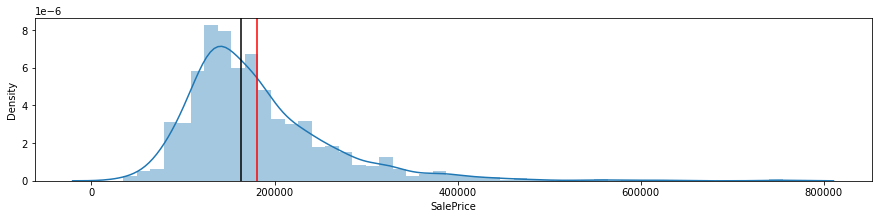

In [20]:
## Checking distribution of Target Variable
plt.figure(figsize=(15,3))
sns.distplot(df_house.SalePrice)
plt.axvline(df_house.SalePrice.mean(), color='red')
plt.axvline(df_house.SalePrice.median(), color='black')
plt.show()

In [21]:
from scipy.stats import norm
from scipy import stats
print(df_house.SalePrice.skew())
print(df_house.SalePrice.kurt())

1.8828757597682129
6.536281860064529


A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

Both skew and kurtosis can be analyzed through descriptive statistics. Acceptable values of skewness fall between − 3 and + 3, and kurtosis is appropriate from a range of − 10 to + 10 when utilizing SEM (Brown, 2006).

Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data


In [22]:
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

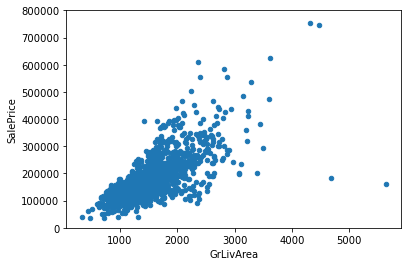

In [23]:

var = "GrLivArea"
data = pd.concat([df_house.SalePrice, df_house[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice', ylim=(0,800000))
plt.show()

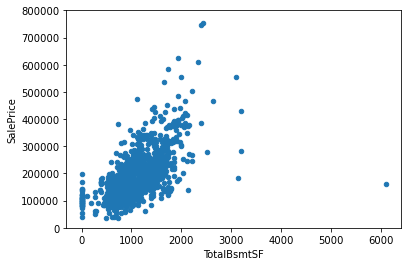

In [24]:
var = "TotalBsmtSF"
data = pd.concat([df_house.SalePrice, df_house[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice', ylim=(0,800000))
plt.show()

#### Plotting Target variable 'sale Price' vs a few select columns

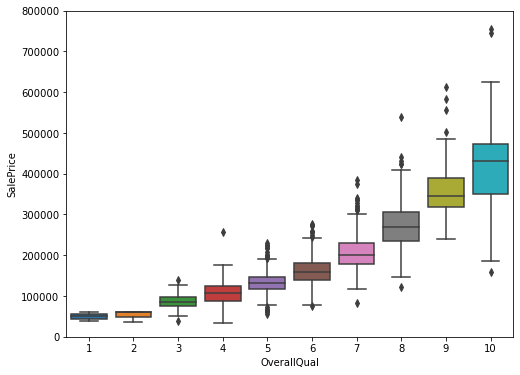

In [25]:
var = "OverallQual"
data = pd.concat([df_house.SalePrice, df_house[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= var, y= 'SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

Increase in the overall quality has a direct positive effect on the sale price


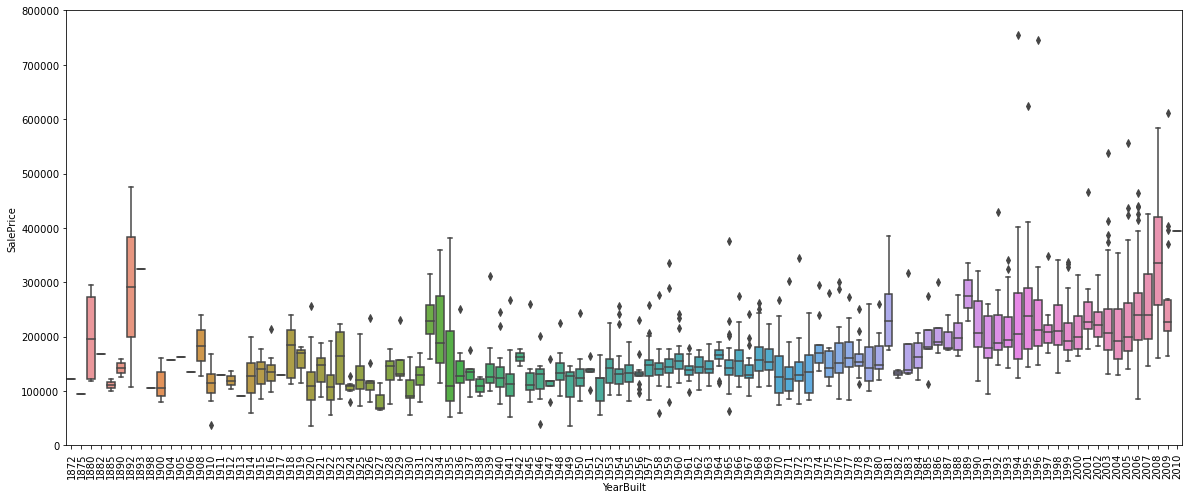

In [26]:
var = "YearBuilt"
data = pd.concat([df_house.SalePrice, df_house[var]], axis=1)
f, ax = plt.subplots(figsize=(20,8))
fig = sns.boxplot(x= var, y= 'SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

Newer houses in general has a direct positive effect on the sale price

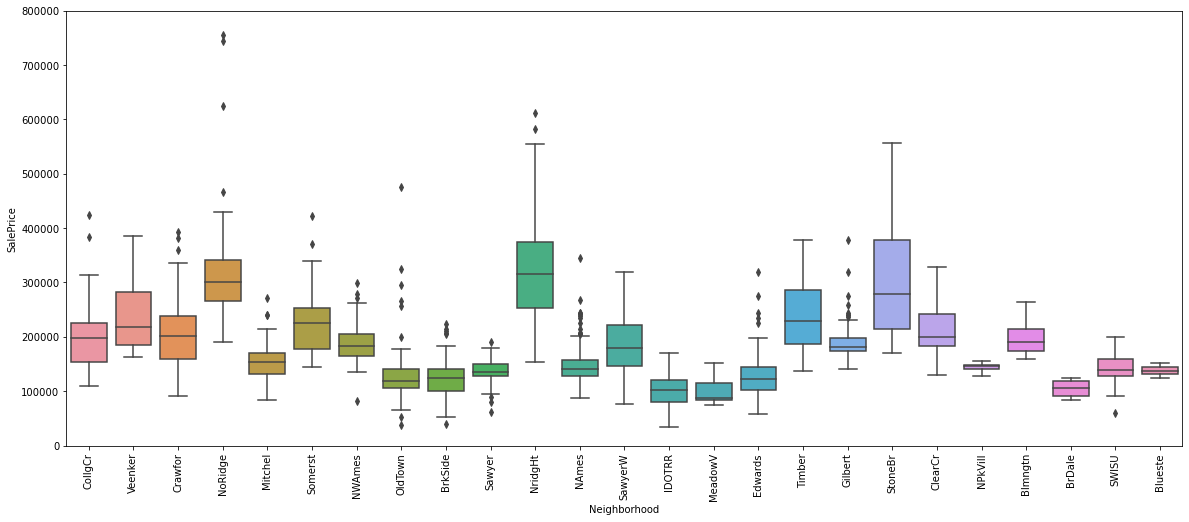

In [27]:
var = "Neighborhood"
data = pd.concat([df_house.SalePrice, df_house[var]], axis=1)
f, ax = plt.subplots(figsize=(20,8))
fig = sns.boxplot(x= var, y= 'SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

Properties in some of the Neighborhoods are high priced.

In [28]:
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

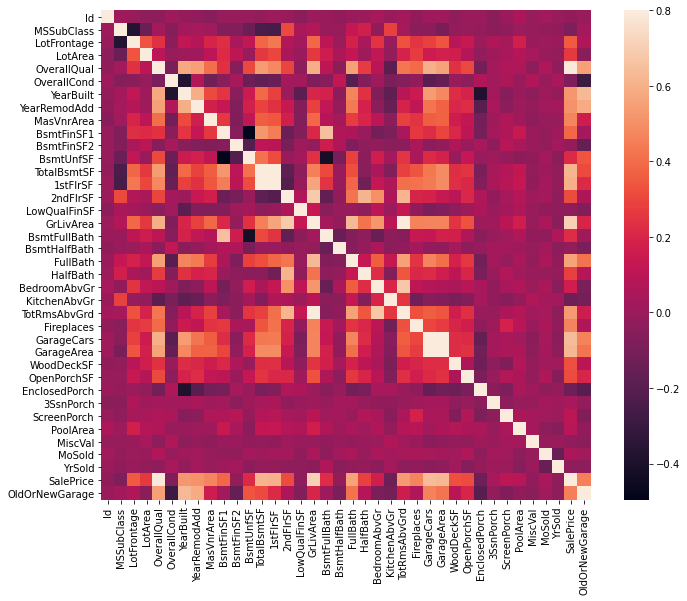

In [29]:
# Plotting Correlation Matrix with heatmap

corrmat = df_house.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Plotting Correlation Matrix of top 10 correlation with heatmap

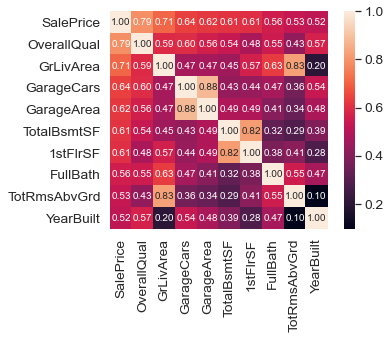

In [30]:
# saleprice correlation matrix - use to identify Multicollinearity
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see that some of the variables are correlated, so its best to use Regularisation method such as Ridge/ Lasso.


In [31]:
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

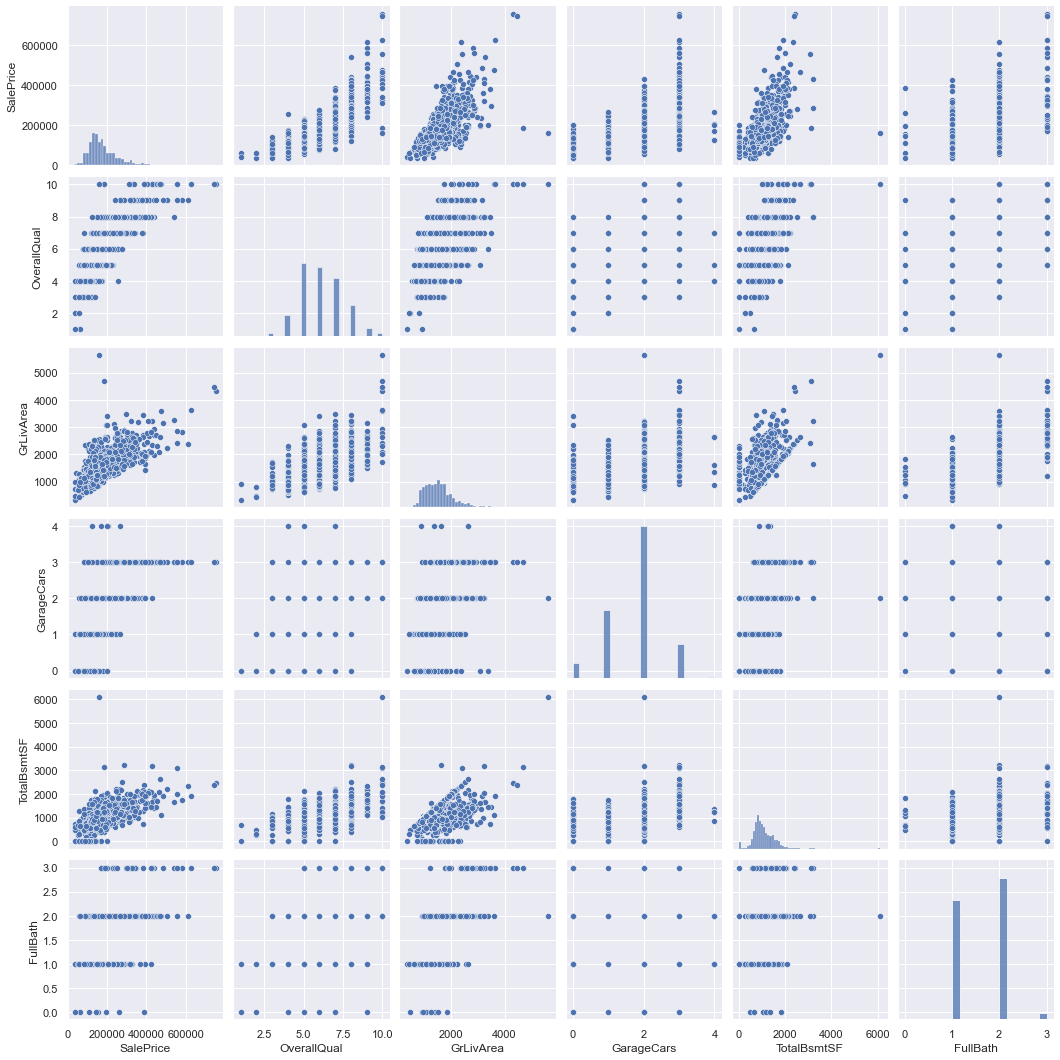

In [32]:
# Checking the correlation of select columns with Pairplots
sns.set()
cols = [ 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(df_house[cols], size=2.5)
plt.show()

Some columns are correlated and some are not contributing to 'SalePrice', so its best to use Regularisation method such as Ridge/ Lasso.

### Lets divide the features into numeric and catagorical data types

In [33]:
types_train = df_house.dtypes
num_train = types_train[(types_train == "int64") | (types_train == "float")]
cat_train = types_train[types_train == "object"]

In [34]:
pd.DataFrame(types_train).reset_index()[0].value_counts()

object     42
int64      36
float64     2
Name: 0, dtype: int64

In [35]:
# Numerical features
numerical_values_train = list(num_train.index)
numerical_values_train

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'OldOrNewGarage']

In [36]:
# Categorical features
categorical_values_train = list(cat_train.index)
categorical_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Data preparation

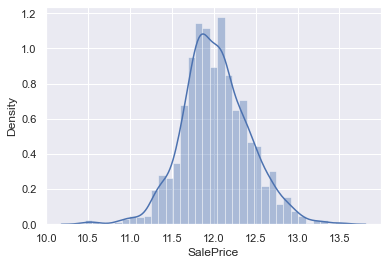

In [37]:
#Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

sns.distplot(np.log(df_house.SalePrice))
plt.show()

In [38]:
df_house["TransformedPrice"] = np.log(df_house.SalePrice)

In [39]:
# Converting dummy variables for categorical features
df_house = pd.get_dummies(df_house, drop_first=True )
df_house.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,OldOrNewGarage,TransformedPrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,1,12.247694,0,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0,12.109011,0,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,1,12.317167,0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,0,11.849398,0,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,1,12.429216,0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [40]:
df_house.shape

(1460, 259)

In [41]:
# Checking dummy variables
types_train = df_house.dtypes
types_train[types_train == "object"]

Series([], dtype: object)

# Modeling

In [42]:
# Assigning X and y
X = df_house.drop(['Id','SalePrice','TransformedPrice'], axis=1)
y = df_house.TransformedPrice

In [43]:
print(X.shape, y.shape)

(1460, 256) (1460,)


In [44]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,OldOrNewGarage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [45]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: TransformedPrice, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Lasso Regression

In [47]:
# List of alphas to tune
params = { 'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
}
params


{'alpha': [0.0001,
  0.001,
  0.01,
  0.05,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  20,
  50,
  100,
  500,
  1000]}

In [48]:
# Applying Lasso

lasso = Lasso()

# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=True)

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.166264,0.030524,0.006564,0.001568,0.0001,{'alpha': 0.0001},-0.082285,-0.092058,-0.089364,-0.078973,-0.075042,-0.083544,0.006343,1,-0.059273,-0.058589,-0.059185,-0.059979,-0.060275,-0.059460,0.000600
1,0.039389,0.001781,0.006084,0.000587,0.001,{'alpha': 0.001},-0.085622,-0.095261,-0.092783,-0.076687,-0.081428,-0.086356,0.006913,2,-0.077683,-0.071547,-0.072431,-0.076982,-0.076893,-0.075107,0.002576
2,0.016210,0.000594,0.005174,0.000182,0.01,{'alpha': 0.01},-0.097661,-0.106130,-0.106408,-0.089930,-0.094918,-0.099009,0.006426,3,-0.098305,-0.088301,-0.093130,-0.099310,-0.097406,-0.095290,0.004080
3,0.074980,0.015177,0.004221,0.000181,0.05,{'alpha': 0.05},-0.104413,-0.119113,-0.119159,-0.103925,-0.103241,-0.109970,0.007493,4,-0.107897,-0.100456,-0.104366,-0.109033,-0.108072,-0.105965,0.003178
4,0.065136,0.008716,0.004758,0.000496,0.1,{'alpha': 0.1},-0.111855,-0.125950,-0.126491,-0.112759,-0.112494,-0.117910,0.006794,8,-0.117114,-0.105883,-0.111674,-0.117315,-0.117416,-0.113880,0.004551


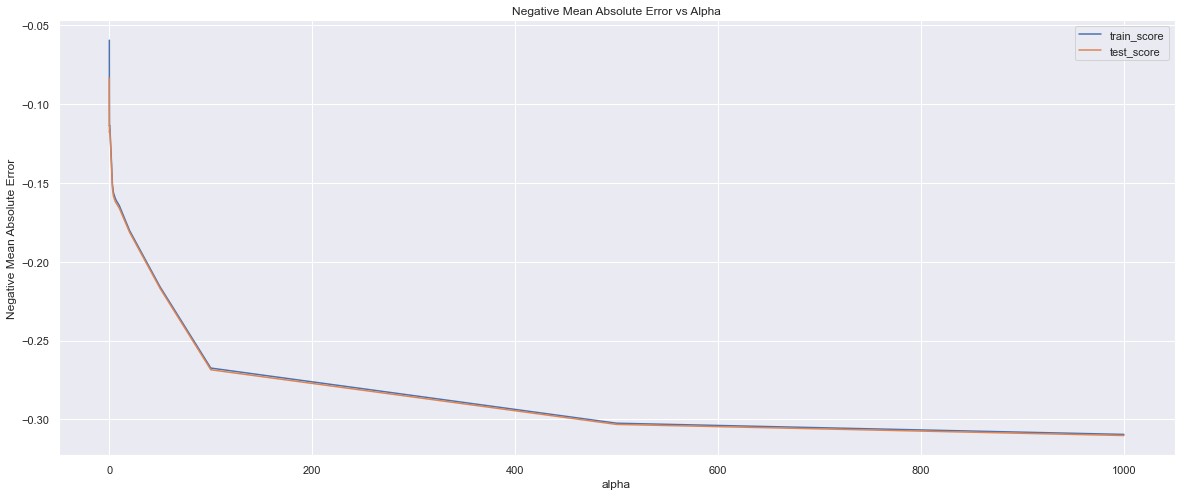

In [50]:

# Plotting mean test and train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")

# plotting
plt.figure(figsize=(20,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend(['train_score', 'test_score'], loc='best')
plt.show()

In [51]:
pd.options.display.float_format = '{:.4f}'.format

In [52]:
#from the above plot and the optimum lambda is around .002
alpha = .002

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [53]:
# Predicting the target variables using Lasso for Train and Test set
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [54]:
# Checking r2_score for train and test set
from sklearn.metrics import r2_score, mean_squared_error
r2_train_lasso = r2_score(y_train, y_pred_train)
r2_test_lasso = r2_score(y_test, y_pred_test)
mse_test_lasso = mean_squared_error(y_test, y_pred_test)

print("r2_train_lasso:",r2_train_lasso)
print("r2_test_lasso:",r2_test_lasso)
print("mse_test_lasso:",mse_test_lasso)

r2_train_lasso: 0.8907106145752106
r2_test_lasso: 0.873459561544476
mse_test_lasso: 0.020820978488977394


In [55]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
lasso.coef_

array([-6.69292722e-04, -4.35618577e-04,  1.96893630e-06,  7.16445898e-02,
        4.24456150e-02,  2.34856459e-03,  1.33843853e-03,  2.22587623e-06,
        3.54402399e-05,  3.38070941e-05,  3.85028488e-05,  2.31536793e-05,
        1.95697968e-04,  2.11145927e-04,  1.78540020e-04,  2.63472049e-05,
        5.39038047e-02,  0.00000000e+00,  3.16016465e-03,  0.00000000e+00,
        4.53891824e-03, -0.00000000e+00,  6.68222909e-03,  8.50334138e-03,
        4.56475154e-02,  6.66412894e-05,  1.18473198e-04, -4.02763851e-05,
        1.53277237e-04,  2.40536568e-04,  2.73614603e-04, -7.04111589e-04,
       -5.54768852e-06, -8.58500779e-04, -6.13018239e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.94818829e-02, -1.75525900e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  7.33729397e-03, -0.00000000e+00,
        0.00000000e+00, -

In [56]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=256)

In [57]:
betas = pd.DataFrame(index=X_train.columns)
betas.head()

""
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond


In [58]:
betas['Lasso'] = lasso.coef_
pd.set_option('display.float_format', lambda x: '%.7f' % x)
betas.head()

,Lasso
MSSubClass,-0.0006693
LotFrontage,-0.0004356
LotArea,0.0000020
OverallQual,0.0716446
OverallCond,0.0424456


In [59]:
# Top 5 important predictors as per lasso
betas.sort_values(by="Lasso", ascending=False).index[:5].to_list()

['Neighborhood_Crawfor',
 'OverallQual',
 'Neighborhood_Somerst',
 'BsmtFullBath',
 'Neighborhood_NridgHt']

In [60]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

### Ridge Regression

In [61]:
#List of alphas to tune for Ridge

params = { 'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 100000 ]
}
params


{'alpha': [0.0001,
  0.001,
  0.01,
  0.05,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  20,
  50,
  100,
  500,
  1000,
  100000]}

In [62]:
%%time
# Applying Ridge

ridge = Ridge()
# Cross Validation
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
CPU times: user 17.5 s, sys: 3.88 s, total: 21.4 s
Wall time: 2.97 s


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 100000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=True)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0115582,0.0052127,0.0036638,0.0006094,0.0001000,{'alpha': 0.0001},-0.0909755,-0.0953404,-0.0949626,-0.0880317,-0.0831790,-0.0904979,0.0045444,15,-0.0548802,-0.0551528,-0.0560854,-0.0563937,-0.0556357,-0.0556296,0.0005622
1,0.0095995,0.0009428,0.0039442,0.0009487,0.0010000,{'alpha': 0.001},-0.0907183,-0.0952809,-0.0949016,-0.0879221,-0.0830664,-0.0903779,0.0045631,13,-0.0549109,-0.0551583,-0.0560985,-0.0564505,-0.0556841,-0.0556605,0.0005711
2,0.0118609,0.0017642,0.0044646,0.0004106,0.0100000,{'alpha': 0.01},-0.0902097,-0.0949122,-0.0945332,-0.0872294,-0.0828323,-0.0899434,0.0045554,8,-0.0550936,-0.0552599,-0.0562211,-0.0566126,-0.0558481,-0.0558071,0.0005710
3,0.0131222,0.0002411,0.0049946,0.0000744,0.0500000,{'alpha': 0.05},-0.0894310,-0.0941465,-0.0939194,-0.0853676,-0.0827089,-0.0891147,0.0045515,4,-0.0560695,-0.0557378,-0.0567402,-0.0571819,-0.0567100,-0.0564879,0.0005162
4,0.0122301,0.0008314,0.0051503,0.0011086,0.1000000,{'alpha': 0.1},-0.0891473,-0.0937204,-0.0939165,-0.0839682,-0.0828510,-0.0887207,0.0046736,2,-0.0572626,-0.0562112,-0.0574226,-0.0581436,-0.0579148,-0.0573910,0.0006708


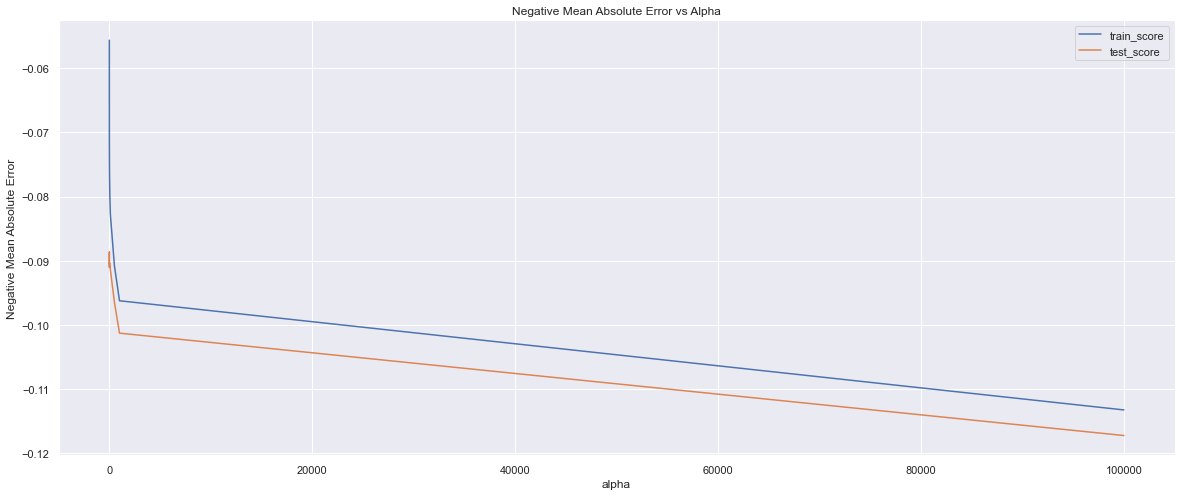

In [64]:
# Plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype("int")

# plotting
plt.figure(figsize=(20,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error vs Alpha")
plt.legend(['train_score', 'test_score'], loc='best')
plt.show()

In [65]:
#from the above plot and the optimum lambda is around 12.5

alpha= 12.5

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=12.5)

In [66]:
# Predicting the trget variables using Lasso for Train and Test set
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [67]:
# Checking r2_score for train and test set
from sklearn.metrics import r2_score, mean_squared_error
r2_train_ridge = r2_score(y_train, y_pred_train)
r2_test_ridge = r2_score(y_test, y_pred_test)
mse_test_ridge = mean_squared_error(y_test, y_pred_test)

print("r2_train_ridge:",r2_train_ridge)
print("r2_test_ridge:",r2_test_ridge)
print("mse_test_ridge:",mse_test_ridge)


r2_train_ridge: 0.9202197335467266
r2_test_ridge: 0.885561398930241
mse_test_ridge: 0.018829740755320613


In [68]:
ridge.coef_

array([-6.34873978e-04, -4.10076966e-04,  1.88790240e-06,  5.85823452e-02,
        3.82584019e-02,  1.48100362e-03,  1.07971513e-03, -1.50756892e-05,
       -1.02333720e-05,  3.44749957e-05, -9.58225171e-07,  2.32834052e-05,
        6.84925896e-05,  7.93493933e-05,  3.00433403e-06,  1.50846318e-04,
        5.23598250e-02,  7.01894804e-03,  2.61542759e-02,  1.70525655e-02,
        1.43098750e-02, -2.72094896e-02,  8.79419035e-03,  4.74609228e-03,
        5.11809115e-02,  3.28114985e-05,  1.06931952e-04, -2.83122036e-05,
        1.61457698e-04,  2.42050595e-04,  2.11720794e-04, -4.36080638e-04,
       -6.43952224e-07, -6.21151880e-04, -5.22282173e-03, -7.30485909e-03,
        4.60675367e-02,  2.92605853e-02,  5.91386294e-02,  8.04373440e-03,
        2.20824977e-02,  2.01680886e-02,  1.15271378e-03,  2.03644194e-02,
       -4.04891527e-02,  4.80279991e-03,  3.44830086e-02,  3.23050816e-02,
        4.40983725e-02, -1.06149618e-02,  3.16357410e-02, -3.21400182e-02,
       -6.16337542e-03, -

In [69]:
betas['Ridge'] = ridge.coef_

In [70]:
betas.reset_index(inplace=True)
betas.columns= ['Features','Lasso','Ridge']
betas

,Features,Lasso,Ridge
0,MSSubClass,-0.0006693,-0.0006349
1,LotFrontage,-0.0004356,-0.0004101
2,LotArea,0.0000020,0.0000019
3,OverallQual,0.0716446,0.0585823
4,OverallCond,0.0424456,0.0382584
...,...,...,...
251,SaleCondition_AdjLand,0.0000000,0.0080525
252,SaleCondition_Alloca,-0.0000000,0.0009698
253,SaleCondition_Family,-0.0000000,0.0155831
254,SaleCondition_Normal,0.0064473,0.0469846


In [71]:
print("r2_train_lasso:",r2_train_lasso)
print("r2_test_lasso:",r2_test_lasso)
print("mse_test_lasso:",mse_test_lasso)
print("r2_train_ridge:",r2_train_ridge)
print("r2_test_ridge:",r2_test_ridge)
print("mse_test_ridge:",mse_test_ridge)

r2_train_lasso: 0.8907106145752106
r2_test_lasso: 0.873459561544476
mse_test_lasso: 0.020820978488977394
r2_train_ridge: 0.9202197335467266
r2_test_ridge: 0.885561398930241
mse_test_ridge: 0.018829740755320613


#### Observation:

#### The optimal lambda value in case of Ridge and Lasso is as below:

##### Ridge - 12.5
##### Lasso - 0.002

##### The model performance by Ridge Regression is slightly better in terms of R2 values and Mean Square Error of Train and Test. However, it would be better to use Lasso since helps in feature reduction (as the coefficient value of one of the feature became 0).
##### It is advisable to use a simple yet robust model.
##### Hence based on Lasso, the factors that generally affect the price are:

In [72]:
betas_lasso = betas[['Features','Lasso']]
top_pos_features = betas_lasso.sort_values(by="Lasso", ascending=False).head(10)
top_neg_features = betas_lasso.sort_values(by="Lasso", ascending=True).head(10)

                 Features     Lasso
61   Neighborhood_Crawfor 0.0744976
3             OverallQual 0.0716446
76   Neighborhood_Somerst 0.0626323
16           BsmtFullBath 0.0539038
71   Neighborhood_NridgHt 0.0531586
81        Condition1_Norm 0.0511856
24             GarageCars 0.0456475
4             OverallCond 0.0424456
38            MSZoning_RL 0.0394819
171       BsmtExposure_Gd 0.0301613


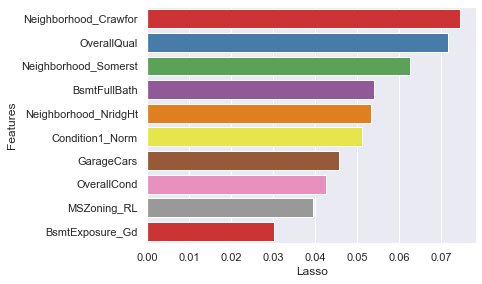

In [73]:
## Top 10 feature as per Lasso features with Positive Coefficient
print(top_pos_features)
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Lasso', palette='Set1', data = top_pos_features)
plt.show()

                 Features      Lasso
62   Neighborhood_Edwards -0.0511675
210      FireplaceQu_none -0.0418427
179      BsmtFinType1_Unf -0.0305575
39            MSZoning_RM -0.0175526
195          HeatingQC_TA -0.0165375
218      GarageFinish_Unf -0.0117189
97         BldgType_Twnhs -0.0112463
173       BsmtExposure_No -0.0111344
164           BsmtQual_Gd -0.0079343
34                 YrSold -0.0061302


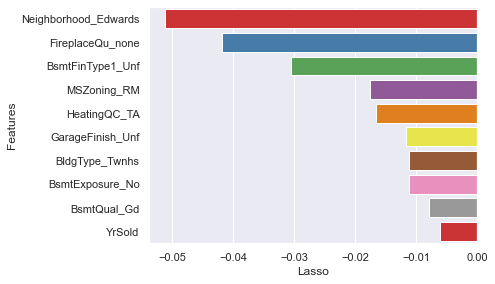

In [74]:
## Top 10 features as per Lasso with negative Coefficient
print(top_neg_features)
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Lasso', palette='Set1', data = top_neg_features)
plt.show()

The variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.


These are the final features that should be selected for predicting the price of house

The equation would look like:

##### log(Y) = Constant + Neighborhood_Crawfor * 0.0744976 + OverallQual * 0.0716446 + Neighborhood_Somerst * 0.0626323 + BsmtFullBath * 0.0539038 + Neighborhood_NridgHt * 0.0531586 + Condition1_Norm * 0.0511856 + GarageCars * 0.0456475 + OverallCond * 0.0424456 + MSZoning_RL * 0.0394819 + BsmtExposure_Gd * 0.0301613 + Neighborhood_Edwards * -0.0511675 + FireplaceQu_none * -0.0418427 + BsmtFinType1_Unf * -0.0305575 + MSZoning_RM * -0.0175526 + HeatingQC_TA * -0.0165375 + GarageFinish_Unf * -0.0117189 + BldgType_Twnhs * -0.0112463 + BsmtExposure_No * -0.0111344 + BsmtQual_Gd * -0.0079343 + YrSold * -0.0061302 + Error term(RSS + alpha * (sum of absolute value of coefficients)

#### INFERENCE
###### Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.
###### The higher values of positive coeeficients suggest a high sale value.
###### Some of those features are:-

Feature                Coefficient

Neighborhood_Crawfor:   0.0744976

OverallQual:            0.0716446

Neighborhood_Somerst:   0.0626323

BsmtFullBath:           0.0539038

Neighborhood_NridgHt:   0.0531586

Condition1_Norm:        0.0511856

GarageCars:             0.0456475

OverallCond:            0.0424456

MSZoning_RL:            0.0394819

BsmtExposure_Gd:        0.0301613


###### The higher values of negative coeeficients suggest a decrease in sale value.
###### Some of those features are:-

Feature	               Coefficient

Neighborhood_Edwards:   -0.0511675

FireplaceQu_none:       -0.0418427

BsmtFinType1_Unf:       -0.0305575

MSZoning_RM:            -0.0175526

HeatingQC_TA:           -0.0165375

GarageFinish_Unf:       -0.0117189

BldgType_Twnhs:         -0.0112463

BsmtExposure_No:        -0.0111344

BsmtQual_Gd:            -0.0079343

YrSold:                 -0.0061302